In [1]:
import numpy as np
import helper

In [2]:
path_root = '/home/aldopedraza/Documentos/data-cic/preprocess_data'
test_images_300 = np.load(path_root + '/images_test_300x300.npy')
pred_test_300 = np.load(path_root + '/predictions_test_300x300.npy')
pred_test_512 = np.load(path_root + '/predictions_test_512x512.npy')
label_test = np.load(path_root + '/label_test.npy')

In [114]:
def bb_intersection_over_union(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2] + boxA[0], boxB[2] + boxB[0])
    yB = min(boxA[3] + boxA[1], boxB[3] + boxB[1])

    # compute the area of intersection rectangle
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
 
    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = boxA[2] * boxA[3]
    boxBArea = boxB[2] * boxB[3]
 
    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground truth areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)
 
    # return the intersection over union value
    return iou

In [57]:
def get_coordinates(list_items):
    new_list = []
    for item in list_items:
        new_item = []
        for box in item:
            new_item.append([box[2], box[3], box[4], box[5]])
        new_list.append(new_item)
    return new_list

In [98]:
prueba = helper.normilize_to_pixel(label_test, 300, 300)
prueba[4][0]

[89.0, 97.0, 27.0, 45.0]

In [126]:
pred = get_coordinates(pred_test_300)
position = 9

In [131]:
print(prueba[position][1])
print(pred[position][0])

[18.0, 90.0, 70.0, 92.0]
[13.879524230957031, 79.74607849121094, 78.06944274902344, 107.91891479492188]


In [132]:
intersection = bb_intersection_over_union(prueba[position][1], pred[position][0])
print(intersection)

0.7991847622997317


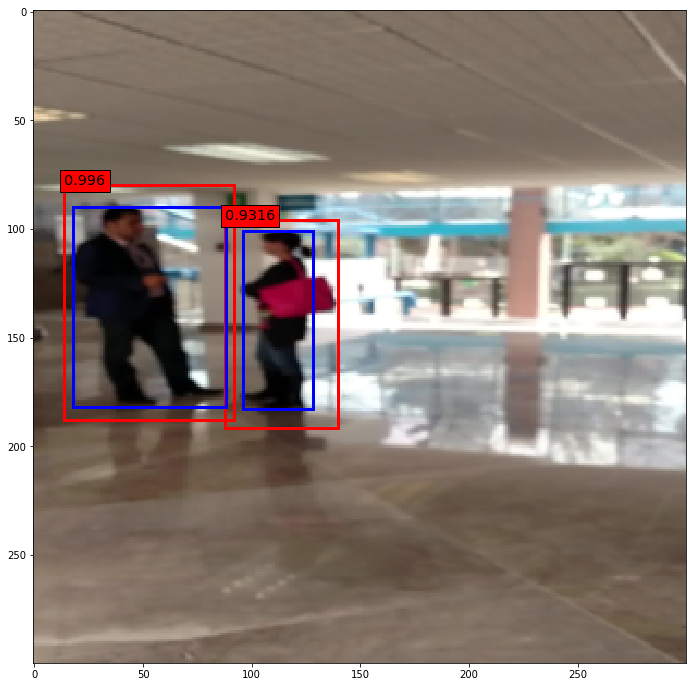

In [127]:
helper.show_image_bb_2(test_images_300[position], pred_test_300[position], prueba[position])